In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('../01_working_with_timestamps/muesli_orders_clean.csv', index_col = 0)

In [4]:
df.columns

Index(['index', 'order_id', 'order_date', 'ship_mode', 'customer_id',
       'customer_name', 'origin_channel', 'country', 'city', 'state',
       'postal_code', 'region', 'category', 'sub-category', 'product_id',
       'sales', 'quantity', 'discount', 'profit', 'month', 'day', 'year',
       'day_name'],
      dtype='object')

In [5]:
df['order_date'] = df['order_date'].astype('datetime64[ns]')

In [6]:
df['order_date'].info

<bound method Series.info of 0      2019-01-16
1      2019-03-11
2      2019-06-20
3      2019-06-17
4      2018-11-24
          ...    
9989   2019-07-25
9990   2018-09-13
9991   2018-10-10
9992   2019-03-15
9993   2020-06-01
Name: order_date, Length: 9994, dtype: datetime64[ns]>

### KPIs

## total profit per year

In [7]:
total_profit_per_year = df.groupby('year')['profit'].sum()

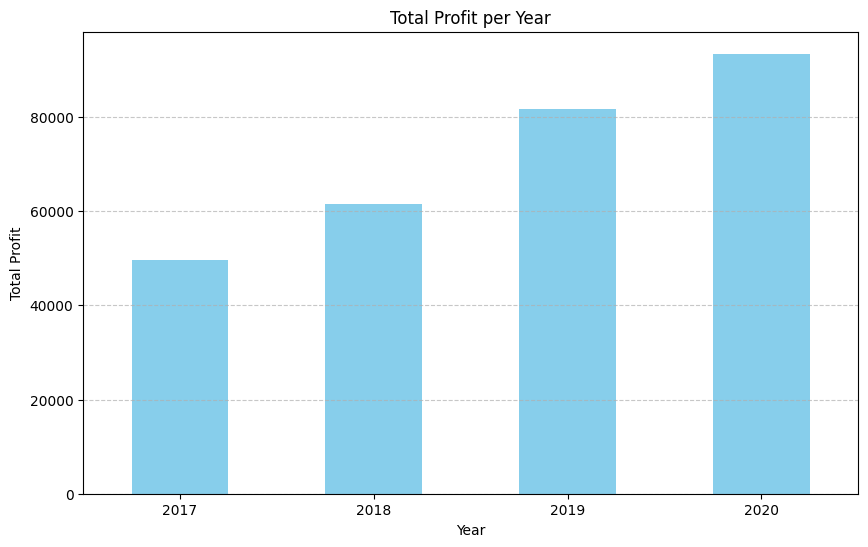

In [8]:
plt.figure(figsize=(10, 6))
total_profit_per_year.plot(kind='bar', color='skyblue')
plt.title('Total Profit per Year')
plt.xlabel('Year')
plt.ylabel('Total Profit')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7);

## total profit per quarter

In [11]:
def format_quarter(x):
    quarter = (x.month - 1) // 3 + 1
    year = x.year
    return f'Q{quarter} {year}'

profit_per_quarter = df.resample('QE', on='order_date')['profit'].sum()

quarter_labels = profit_per_quarter.index.map(format_quarter)

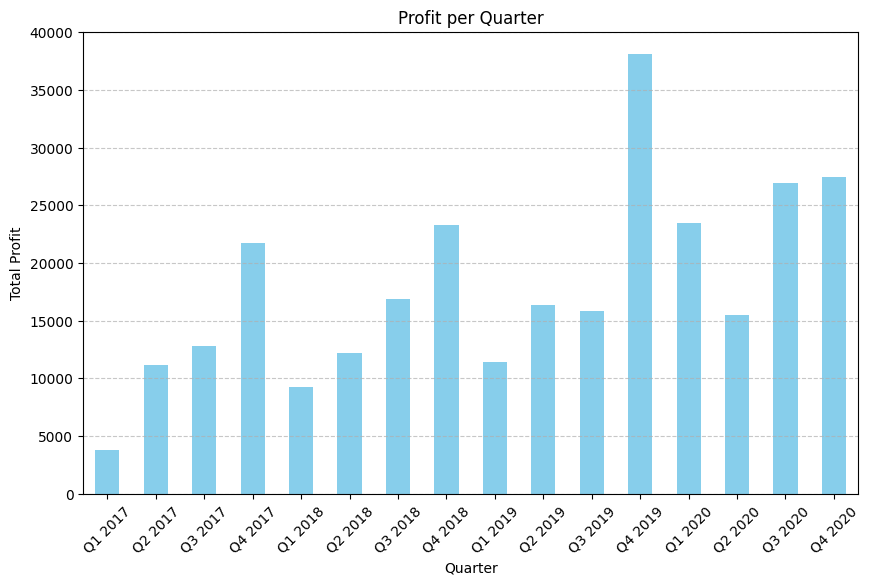

In [12]:
plt.figure(figsize=(10, 6))
profit_per_quarter.plot(kind='bar', color='skyblue')
plt.title('Profit per Quarter')
plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.xticks(range(len(quarter_labels)), quarter_labels, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7);

## profit margin 
    a ratio that expresses profit as a percentage of revenue.

In [13]:
df['profit_margin'] = df['profit'] / df['sales']
df['profit_margin'].min(), df['profit_margin'].max()

(-2.75, 0.5)

In [14]:
df_margin_sorted = df[['profit_margin']].sort_values(by= 'profit_margin',ascending=True)
df_margin_sorted

,profit_margin
1328,-2.75
1310,-2.75
1722,-2.75
1699,-2.75
1708,-2.70
...,...
3043,0.50
1874,0.50
4617,0.50
1159,0.50


In [15]:
df.loc[[1328,1310,1722,1699]]

,index,order_id,order_date,ship_mode,customer_id,customer_name,origin_channel,country,city,state,...,product_id,sales,quantity,discount,profit,month,day,year,day_name,profit_margin
1328,677,US-2020-119438,2020-03-18,Standard Class,CD-11980,Carol Darley,Email,United States,Tyler,Texas,...,OFF-AP-10000804,2.688,3,0.8,-7.392,3,18,2020,Wednesday,-2.75
1310,262,US-2020-155299,2020-06-08,Standard Class,Dl-13600,Dorris liebe,Sales,United States,Pasadena,Texas,...,OFF-AP-10002203,1.624,2,0.8,-4.466,6,8,2020,Monday,-2.75
1722,9165,CA-2018-164007,2018-06-08,Standard Class,MG-17695,Maureen Gnade,Email,United States,Chicago,Illinois,...,OFF-AP-10003849,143.128,2,0.8,-393.602,6,8,2018,Friday,-2.75
1699,8767,CA-2018-107083,2018-11-21,Standard Class,BB-11545,Brenda Bowman,Sales,United States,Fort Worth,Texas,...,OFF-AP-10004136,24.588,3,0.8,-67.617,11,21,2018,Wednesday,-2.75


## profit margins from promotions

In [16]:
promotion_profit_margin = df.groupby('discount')['profit_margin'].mean()

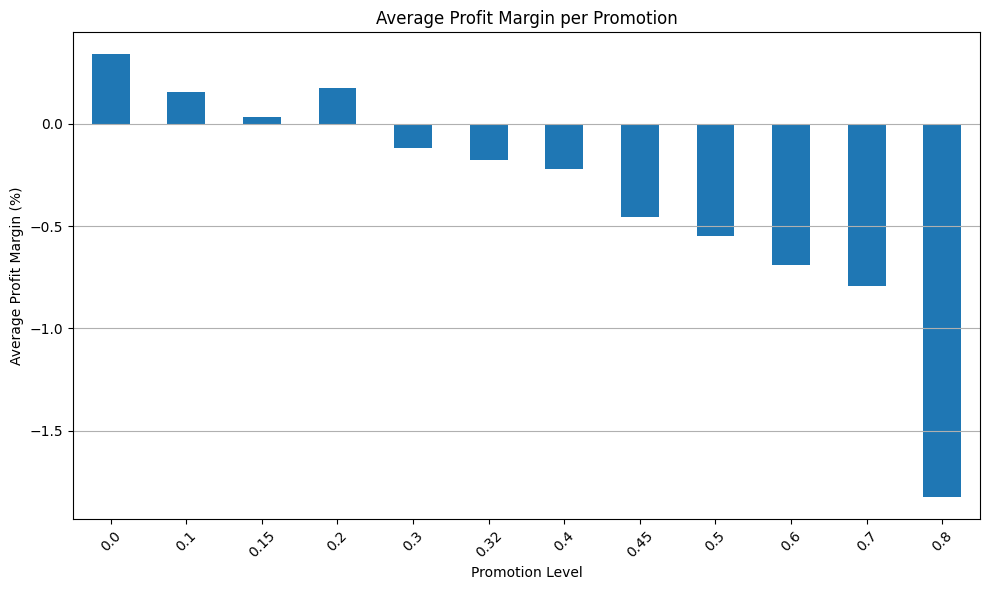

In [17]:
plt.figure(figsize=(10, 6))
promotion_profit_margin.plot(kind='bar')
plt.title('Average Profit Margin per Promotion')
plt.xlabel('Promotion Level')
plt.ylabel('Average Profit Margin (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add gridlines on y-axis
plt.tight_layout()
plt.show()

## profit by subcategory

In [18]:
profit_by_subcategory = df.groupby('sub-category')['profit'].sum()
profit_by_subcategory_sorted = profit_by_subcategory.sort_values(ascending=False)

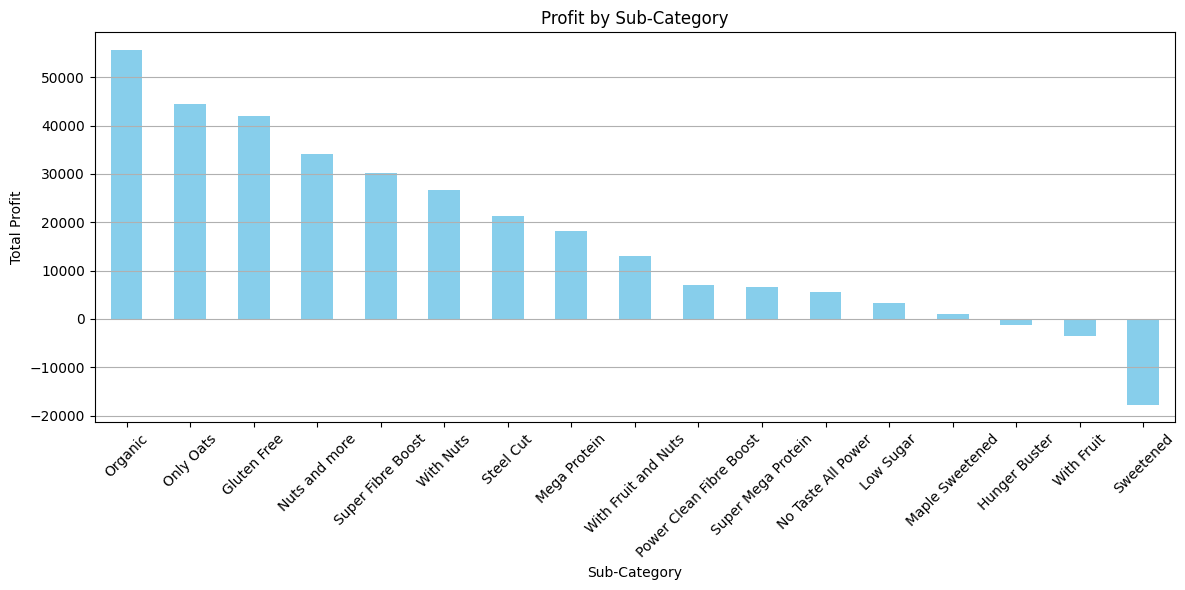

In [19]:
plt.figure(figsize=(12, 6))
profit_by_subcategory_sorted.plot(kind='bar', color='skyblue')
plt.title('Profit by Sub-Category')
plt.xlabel('Sub-Category')
plt.ylabel('Total Profit')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show();

In [20]:
df['sub-category'].value_counts()

sub-category
Super Fibre Boost          1523
Nuts and more              1370
With Fruit and Nuts         957
Only Oats                   889
Steel Cut                   846
Super Mega Protein          796
Gluten Free                 775
With Nuts                   617
Mega Protein                466
No Taste All Power          364
Sweetened                   319
Power Clean Fibre Boost     254
With Fruit                  228
Maple Sweetened             217
Hunger Buster               190
Low Sugar                   115
Organic                      68
Name: count, dtype: int64

# Metrics

## top 20 best selling cities


In [21]:
city_sales = df.groupby('city')['sales'].sum()
best20_cities = city_sales.sort_values(ascending=False).head(20)
print("Best selling cities:")
best20_cities

Best selling cities:


city
New York City    256368.1610
Los Angeles      175851.3410
Seattle          119540.7420
San Francisco    112669.0920
Philadelphia     109077.0130
Houston           64504.7604
Chicago           48539.5410
San Diego         47521.0290
Jacksonville      44713.1830
Springfield       43054.3420
Detroit           42446.9440
Columbus          38706.2430
Newark            28576.1190
Columbia          25283.3240
Lafayette         25036.2000
Jackson           24963.8580
San Antonio       21843.5280
Burlington        21668.0820
Arlington         20214.5320
Dallas            20131.9322
Name: sales, dtype: float64

## best selling weekdays

In [22]:
sales_per_weekday = df.groupby('day_name')['sales'].sum().reset_index()
sales_per_weekday

,day_name,sales
0,Friday,378904.9580
1,Monday,333982.1338
2,Saturday,233241.1324
3,Sunday,186407.1998
4,Thursday,371968.4371
5,Tuesday,410829.9262
6,Wednesday,381867.0730


In [23]:
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_per_weekday['day_name'] = pd.Categorical(sales_per_weekday['day_name'], categories=custom_order, ordered=True)
sales_per_weekday = sales_per_weekday.sort_values('day_name')
sales_per_weekday

,day_name,sales
1,Monday,333982.1338
5,Tuesday,410829.9262
6,Wednesday,381867.0730
4,Thursday,371968.4371
0,Friday,378904.9580
2,Saturday,233241.1324
3,Sunday,186407.1998


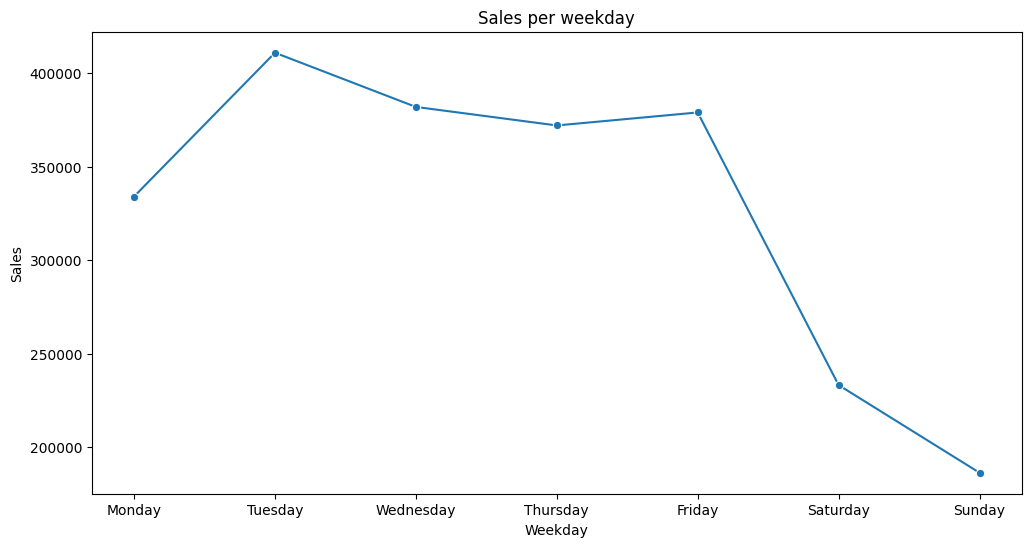

In [24]:
plt.figure(figsize=(12, 6))

sns.lineplot(data=sales_per_weekday, x='day_name', y='sales',marker='o')

plt.title('Sales per weekday')
plt.xlabel('Weekday')
plt.ylabel('Sales');

## no. of orders per weekday

In [25]:
orders_per_weekday = df.groupby('day_name')['order_id'].nunique().reset_index()
custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
orders_per_weekday['day_name'] = pd.Categorical(orders_per_weekday['day_name'], categories=custom_order, ordered=True)
orders_per_weekday = orders_per_weekday.sort_values('day_name')

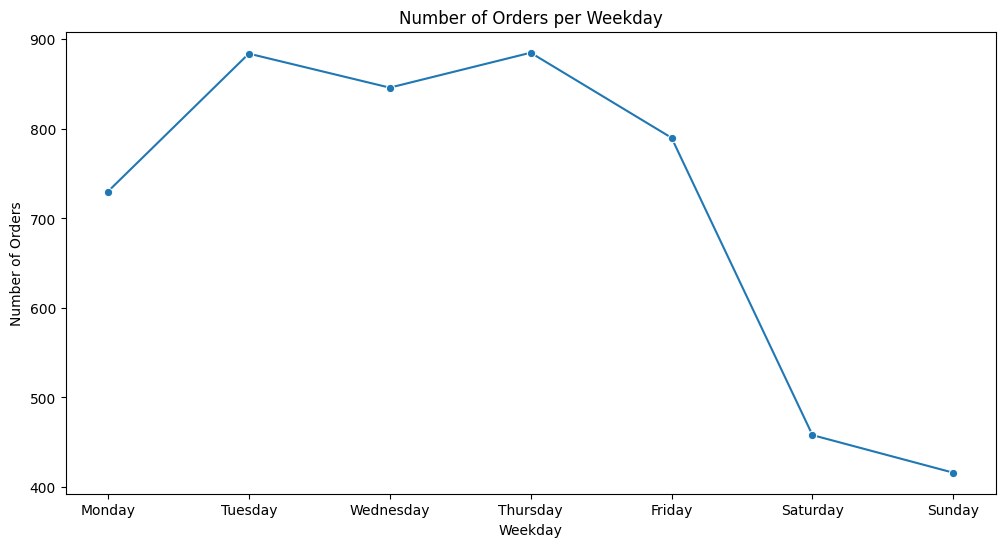

In [26]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=orders_per_weekday, x='day_name', y='order_id', marker='o')
plt.title('Number of Orders per Weekday')
plt.xlabel('Weekday')
plt.ylabel('Number of Orders')
plt.show()

## orders per customer

In [27]:
orders_per_customer = df.groupby('customer_id').size().reset_index(name='order_count')
orders_per_customer

,customer_id,order_count
0,AA-10315,11
1,AA-10375,15
2,AA-10480,12
3,AA-10645,18
4,AB-10015,6
...,...,...
788,XP-21865,28
789,YC-21895,8
790,YS-21880,12
791,ZC-21910,31


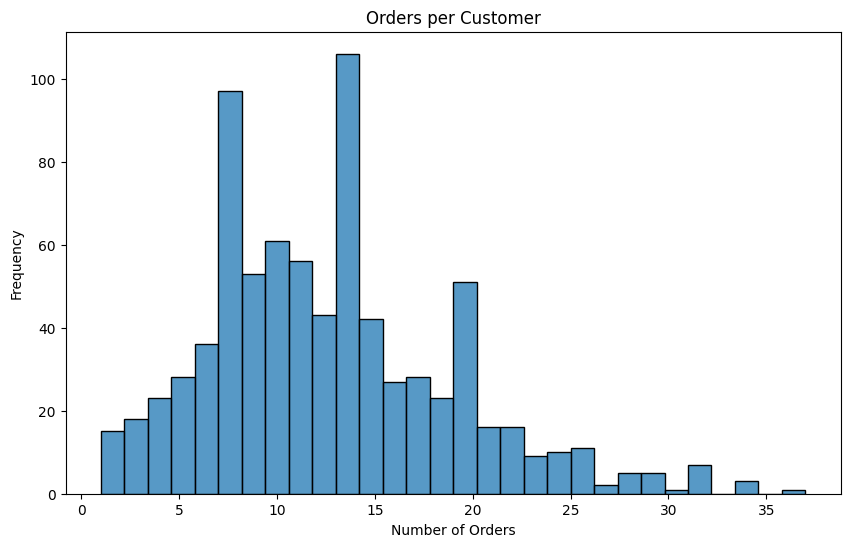

In [28]:
plt.figure(figsize=(10, 6))

sns.histplot(orders_per_customer['order_count'], bins=30, kde=False)
plt.title('Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency');

## top selling products per state

In [29]:
product_state = df.groupby(['state', 'product_id'])['profit'].sum()
product_state_sorted = product_state.groupby('state', group_keys=False).nlargest(1)
top_product_state = product_state_sorted.reset_index()
top_product_state

,state,product_id,profit
0,Alabama,TEC-MA-10000010,1459.2000
1,Arizona,TEC-PH-10002624,211.4955
2,Arkansas,OFF-BI-10001359,843.1706
3,California,OFF-BI-10003527,2287.7820
4,Colorado,TEC-PH-10001795,247.9960
5,Connecticut,FUR-CH-10002335,294.6710
6,Delaware,TEC-CO-10004722,5039.9856
7,District of Columbia,TEC-MA-10004212,648.5624
8,Florida,TEC-PH-10001459,327.5922
9,Georgia,OFF-BI-10003527,3812.9700


In [30]:
top_product_state['product_id'].value_counts().head(6)

product_id
TEC-CO-10004722    5
OFF-BI-10003527    3
TEC-AC-10002049    2
TEC-PH-10001795    2
OFF-BI-10001120    2
FUR-TA-10003473    2
Name: count, dtype: int64

In [33]:
top_product_state_sorted = top_product_state.sort_values(by='profit', ascending=False)
top_product_state_sorted

,state,product_id,profit
12,Indiana,TEC-CO-10004722,8399.9760
45,Washington,TEC-CO-10004722,6719.9808
6,Delaware,TEC-CO-10004722,5039.9856
20,Michigan,OFF-BI-10000545,4946.3700
21,Minnesota,OFF-BI-10001120,4630.4755
30,New York,TEC-CO-10004722,3919.9888
9,Georgia,OFF-BI-10003527,3812.9700
44,Virginia,TEC-MA-10001127,2799.9840
37,Rhode Island,TEC-CO-10001449,2591.9568
28,New Jersey,TEC-MA-10001047,2365.9818
